### This is the phase one for the project Creadit Card Data Analysis to launch the new credit card product.

#### This project is divided into two phases:
1. **Phase 1**: Data Analysis and Visualization
2. **Phase 2**: Model Building and Evaluation

#### Phase 1 includes:
- Data Loading
- Data Cleaning
- Data Exploration
- Data Visualization

#### We have data in CSV format as well as DB format. We will use the CSV format and db format for this project.



### 01 Let's start with loading the data from excel file.


In [319]:
### Load Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [320]:
### Load the customer data
# Assuming the data is in a CSV file named 'customers.csv' in a 'data' directory
# Adjust the path as necessary

df_cust = pd.read_csv('data/customers.csv')
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [321]:
### Display the shape of the DataFrame
# This will show the number of rows and columns in the DataFrame
df_cust.shape

(1000, 8)

In [322]:
### Load other data of credit card profiles and transactions
# Assuming the data is in CSV files named 'credit_profiles.csv' and 'transactions.csv'

df_cs = pd.read_csv('data/credit_profiles.csv')
df_trans = pd.read_csv('data/transactions.csv')



In [323]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [324]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [325]:
df_cust.shape, df_cs.shape, df_trans.shape

((1000, 8), (1004, 6), (500000, 7))

### 02 Data Cleaning - Handling the null values


In [326]:
### Get Description of the DataFrames df_cust
df_cust.describe()


## In description, we can see that the 
# 'age' column has a minimum value of 1, which is likely an error since age cannot be less than 18 in this context.
# The 'income' column has a minimum value of 2, which might indicate that some customers have no income reported.


,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [327]:
### Check null values in the df_cust DataFrame  
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [328]:
### We can see annual_income has 50 null values, 
# let's check those rows to understand the context of these null values.
df_cust[df_cust.annual_income.isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [329]:
### Below way we can deal with the null values in annual_income column
## 1. We can drop the rows with null values in annual_income
## 2. We can fill the null values with the mean or median of the annual_income column
## 3. We can fill the null values with a specific value, like 0 or 'Unknown'
## 4. We ca use forward fill or backward fill to fill the null values with the previous or next value in the column
## 5. We can use interpolation to fill the null values with the average of the previous

## In our case, we will fill the null values with the median of the annual_income column
## Before replace with median, if yur observe occupation column,
#  So we can calulate the median income for each occupation and fill the null values with the median income of that occupation

occupation_median_income = df_cust.groupby('occupation')['annual_income'].median()
occupation_median_income

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [330]:
### Let's create a function to fill the null values in annual_income column with the median income of the occupation
def fill_null_income(row):
    if pd.isnull(row['annual_income']):
        return occupation_median_income[row['occupation']]
    else:
        return row['annual_income']

In [331]:
## Apply the function to the annual_income column
# This will fill the null values in the annual_income column with the median income of the occupation
# axis=1 means we are applying the function row-wise
df_cust['annual_income'] = df_cust.apply(fill_null_income, axis=1)

## Or You can use lambda function to achieve the same result
## df_cust['annual_income'] = df_cust.apply(lambda row: occupation_median_income[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'], axis=1)

In [332]:
## Verify that the null values in annual_income column are filled
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Text(0.5, 1.0, 'Histogram of Annual Income')

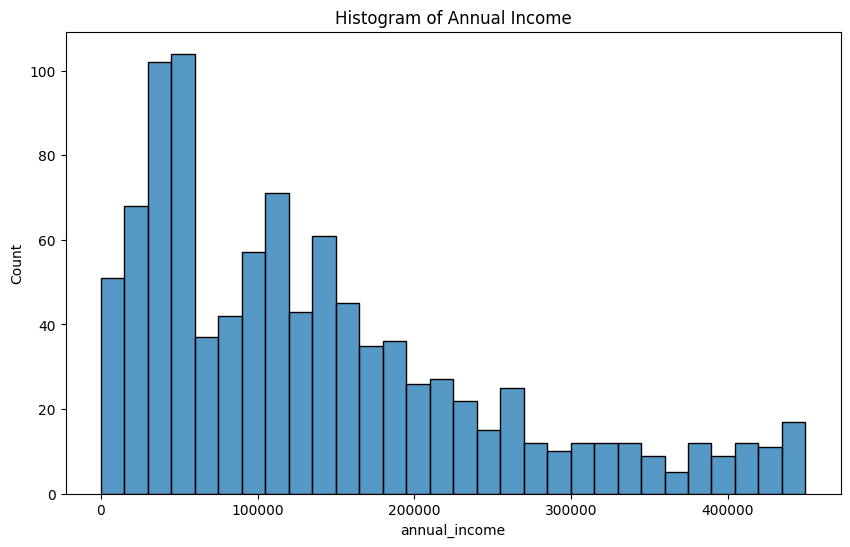

In [333]:
## Let's check income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cust['annual_income'], bins=30, kde=False)
plt.title('Histogram of Annual Income')

In [334]:
## Check description of the DataFrame df_trans and df_cs

df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [335]:
df_cs.isnull().sum()    

cust_id                            0
credit_score                       0
credit_utilisation                 4
outstanding_debt                   4
credit_inquiries_last_6_months     4
credit_limit                      69
dtype: int64

In [336]:
## as this is a transaction data, it is expected to have some null values in the 'transaction_amount' column

In [337]:
df_trans.isnull().sum() 

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [338]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [339]:
## Again we have platform column with null values, but this is strictly not required for our analysis, so we can ignore this column for now.

### 03 Data Cleaning - Check for outliers


In [340]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [341]:
## In above we can clearly see that the 'age' has min value of 1 and maximun value 135, and this is not realistic.
## Also if we see annual_income, it has min value of 2, which is also not realistic.
## Consider annual_income should be atleast 100

## Let's handle outliers for annual_income, to handle this we can replace value less than 100 with occupation median income
## We will use iretation to fill the null values with the average of the previous and next value in the column

for index, row in df_cust.iterrows():
    if row['annual_income'] < 100:
        df_cust.at[index, 'annual_income'] = occupation_median_income[row['occupation']]

In [342]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [343]:
## check income less than 100   
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [344]:
## Let's check the age column for outliers
## we will use IQR method to identify outliers

mean = df_cust['age'].mean()
std = df_cust['age'].std()

lower_bound = df_cust.age.mean() - 3 * df_cust.age.std()
upper_bound = df_cust.age.mean() + 3 * df_cust.age.std()

lower_bound, upper_bound

(np.float64(-10.593464130550373), np.float64(83.40346413055038))

In [345]:
df_cust[(df_cust.age<lower_bound)|(df_cust.age>upper_bound)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
703,704,Aanya Sharma,Female,110,City,Freelancer,43404.0,Single
709,710,Anika Verma,Female,110,City,Data Scientist,98417.0,Married
728,729,Rehan Yadav,Male,135,City,Business Owner,382836.0,Married
832,833,Ridhi Raj,Female,110,City,Fullstack Developer,95379.0,Single


Text(0.5, 1.0, 'Histogram of Age')

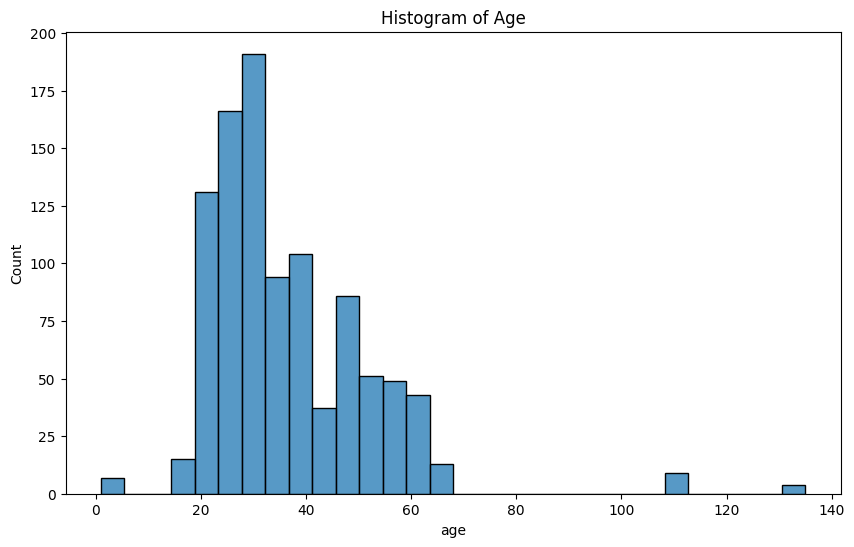

In [346]:
## check distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df_cust['age'], bins=30, kde=False)
plt.title('Histogram of Age')

In [347]:
## Remove outliers from age column
df_cust_without_outlier = df_cust[(df_cust.age >= lower_bound) & (df_cust.age <= upper_bound)]

Text(0.5, 1.0, 'Histogram of Age')

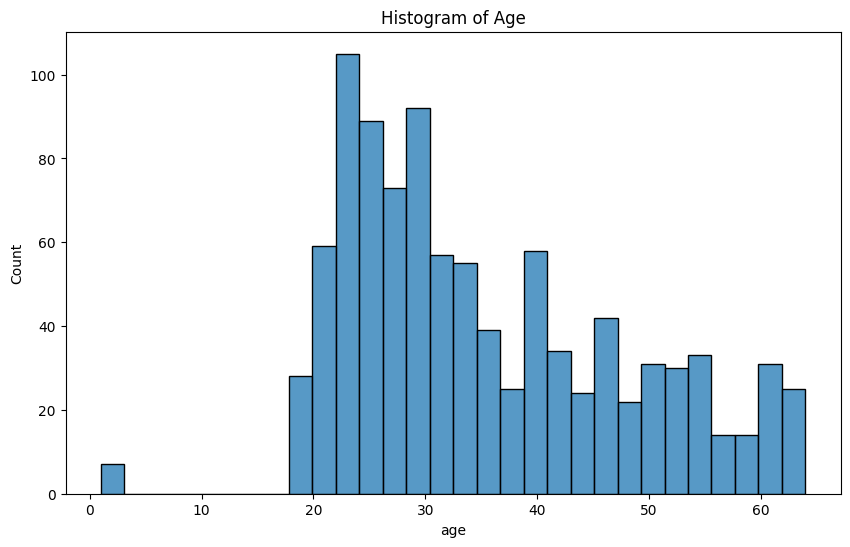

In [348]:
## check distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df_cust_without_outlier['age'], bins=30, kde=False)
plt.title('Histogram of Age')

In [349]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


### 03 Data Visualization - Annual Income

In [350]:
## Find occupation wise annual income average

occupation_avg_income = df_cust.groupby('occupation')['annual_income'].mean().sort_values(ascending=False)
occupation_avg_income


occupation
Business Owner         268447.368512
Data Scientist         137021.266304
Fullstack Developer     78727.972973
Freelancer              76327.508772
Accountant              64123.562500
Consultant              60703.154639
Artist                  45309.236842
Name: annual_income, dtype: float64

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\2394975776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_avg_income.index, y=occupation_avg_income.values, palette='viridis')


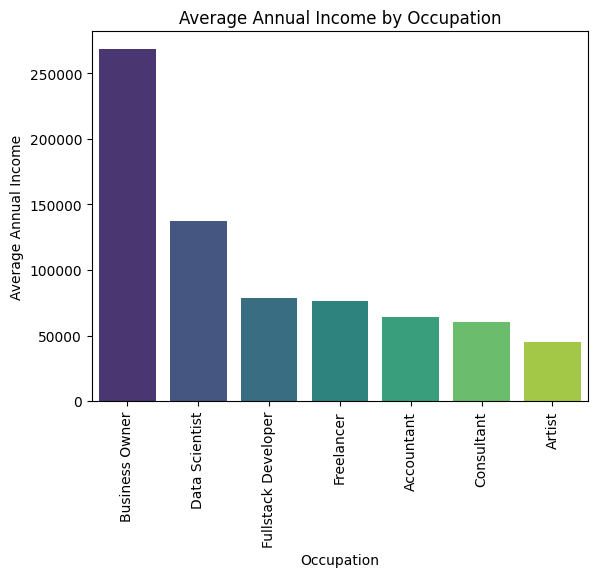

In [351]:
sns.barplot(x=occupation_avg_income.index, y=occupation_avg_income.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Occupation')
plt.show()

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


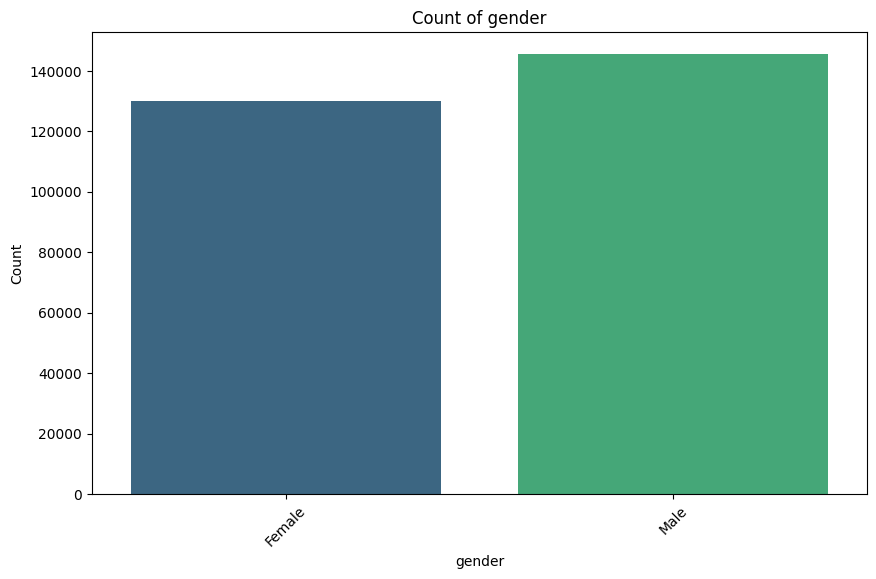

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


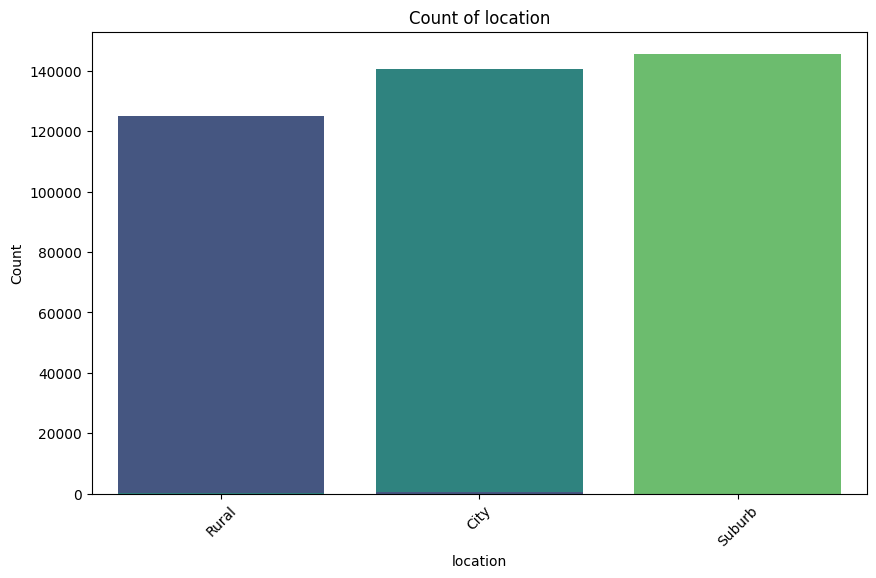

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


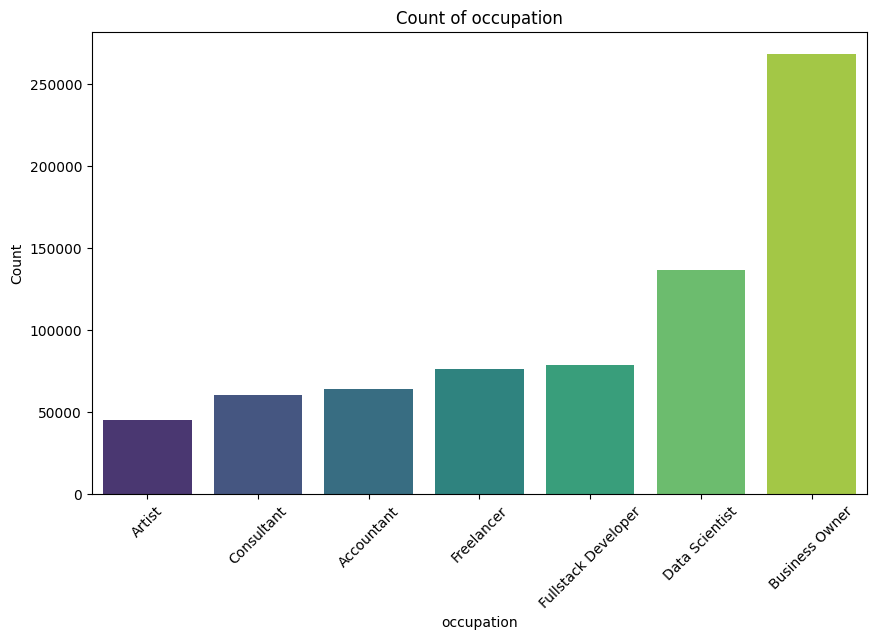

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


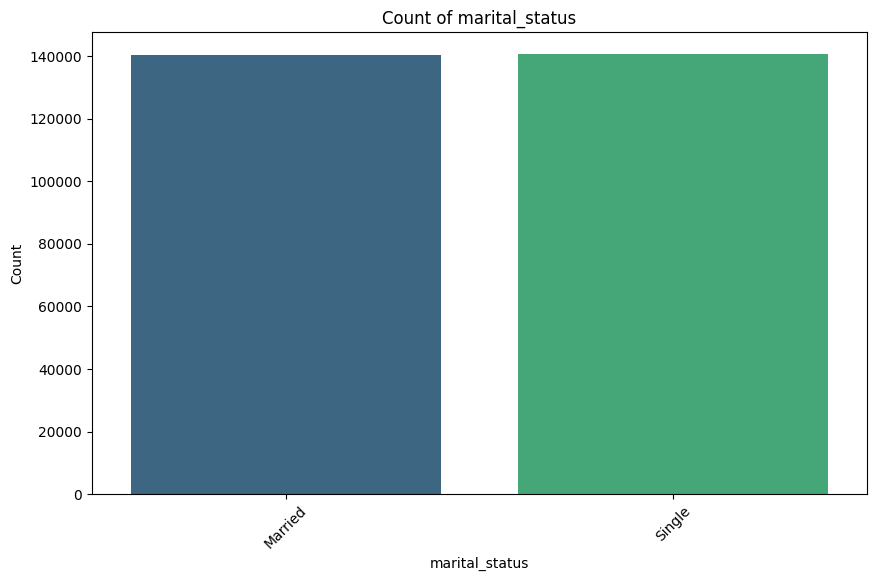

In [352]:
## We can plot for other columns as well, like gender, location, occupation, marital status, etc.

categorical_columns=['gender', 'location', 'occupation', 'marital_status']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    avg_income_per_group = df_cust.groupby(column)['annual_income'].mean().sort_values(ascending=False).sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=df_cust, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\1790311944.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\1790311944.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\1790311944.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\1790311944.py:19: FutureWarning: 

The `ci` 

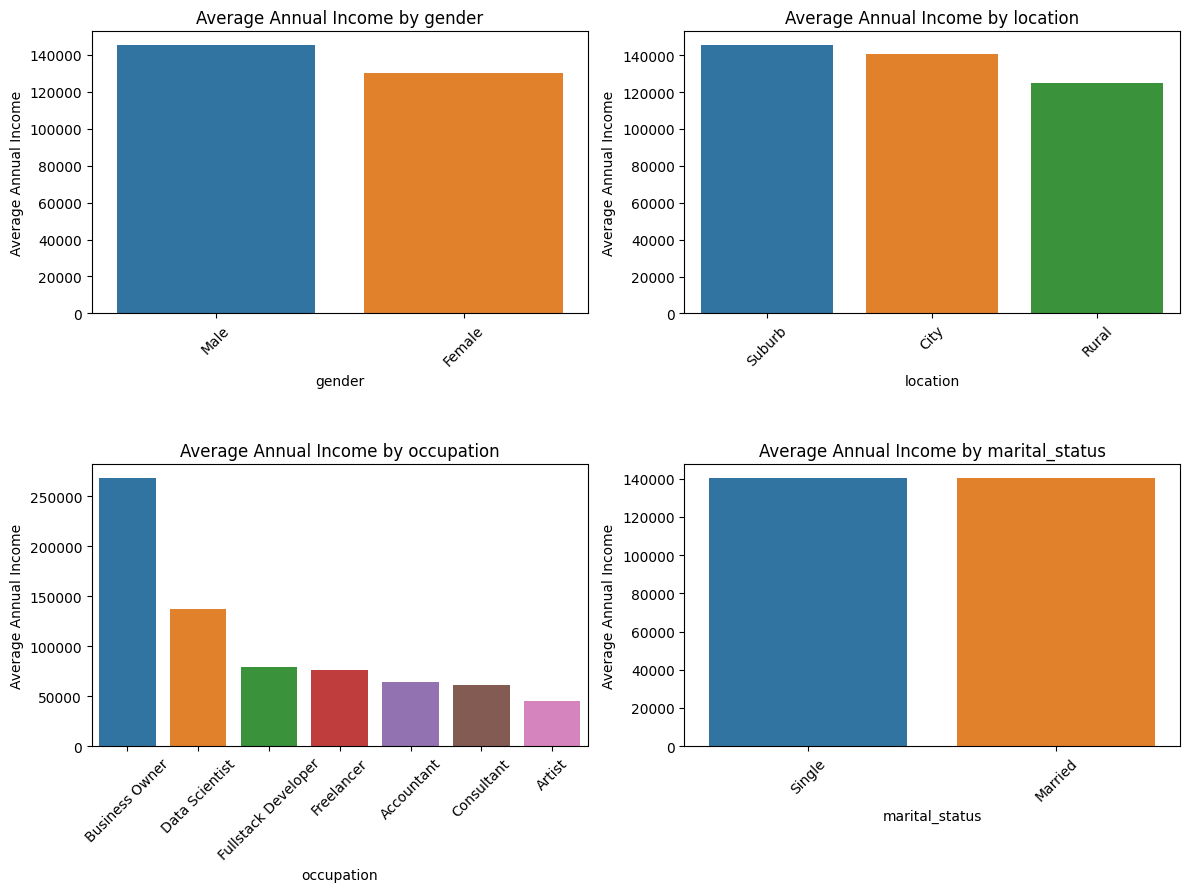

In [353]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## 04 Data Cleaning / analysis - Age

In [354]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [355]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [356]:
df_cust.isnull().sum()  

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [357]:
## So don't have any null values in the DataFrame df_cust after cleaning
## But we have some outliers in the age 


In [358]:
df_cust.age.describe()


count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

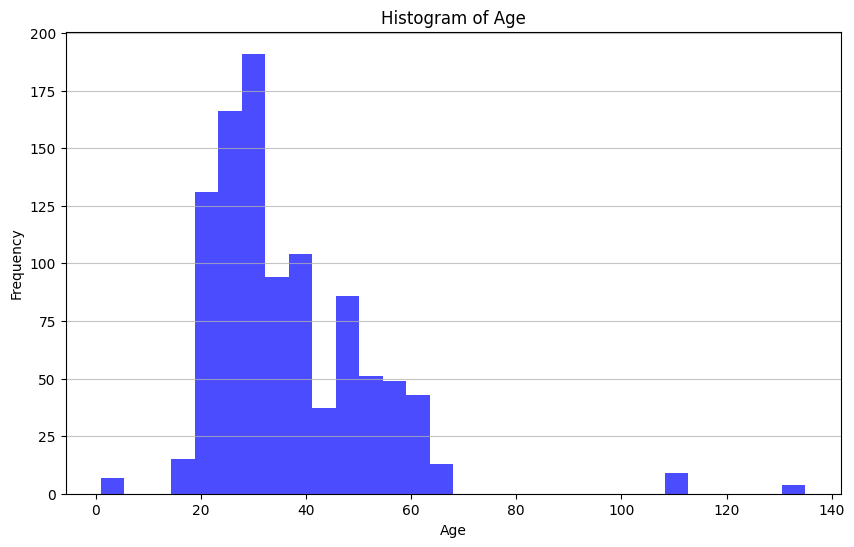

In [359]:
## Plot histogram of age using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_cust.age, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



In [360]:
## Business requirements: age should be between 15 and 80

df_cust[(df_cust.age <= 15)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married
845,846,Rohan Jaiswal,Male,1,City,Consultant,20838.0,Married
855,856,Aanya Taneja,Female,2,City,Fullstack Developer,30689.0,Married
895,896,Krishna Goswami,Male,1,City,Freelancer,31533.0,Married


In [361]:
df_cust[(df_cust.age >= 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
703,704,Aanya Sharma,Female,110,City,Freelancer,43404.0,Single
709,710,Anika Verma,Female,110,City,Data Scientist,98417.0,Married
728,729,Rehan Yadav,Male,135,City,Business Owner,382836.0,Married
832,833,Ridhi Raj,Female,110,City,Fullstack Developer,95379.0,Single


In [362]:
df_cust[(df_cust.age <= 15)].shape, df_cust[(df_cust.age >= 80)].shape

((7, 8), (13, 8))

In [363]:
df_cust[(df_cust.age <= 15) | (df_cust.age >= 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [364]:
df_cust[(df_cust.age <= 15) | (df_cust.age >= 80)].shape    

(20, 8)

In [365]:
df_cust.age.mean()

np.float64(36.405)

In [366]:
occupation_median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
occupation_median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [367]:
outliers = df_cust[(df_cust.age <= 15) | (df_cust.age >= 80)]
outliers.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married


In [368]:
for index, row in outliers.iterrows():
    if row['age'] <= 15 or row['age'] >= 80:
        df_cust.at[index, 'age'] = occupation_median_age_per_occupation[row['occupation']]

df_cust.age.describe()

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_23620\2929825177.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index, 'age'] = occupation_median_age_per_occupation[row['occupation']]


count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

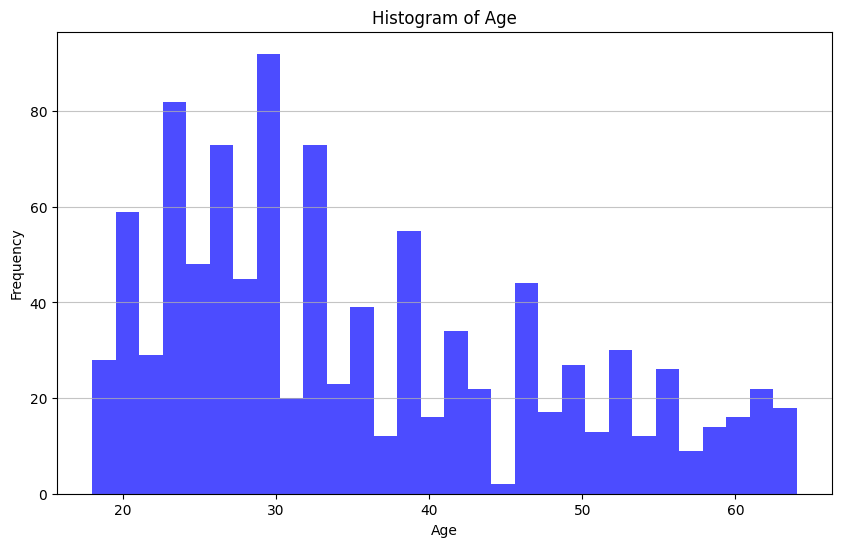

In [369]:
## Plot histogram of age using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_cust.age, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()




### 05 Data Visualization - Age, Gender, Location

Requirements:
1. Analyze customer distribution per age group. Form the following age groups:
   a. Youngsters 18 - 25
   b. Mid Age Proffessionals 26 - 48
   c. Senior 49 - 65
2. Analyze the customer distribution per location and gender.



In [370]:
## to age groups we will create a new column 'age_group' in the df_cust DataFrame

def get_age_group(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 48:
        return '26-48'
    elif 49 <= age <= 65:
        return '49-65'
    else:
        return 'Other'

In [371]:
df_cust['age_group'] = df_cust['age'].apply(get_age_group)

In [372]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [373]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group_cut'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [374]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,age_group_cut
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,26-48


In [375]:
## take counts for each age group
age_group_counts = df_cust['age_group'].value_counts().sort_index()
age_group_counts

age_group
18-25    246
26-48    567
49-65    187
Name: count, dtype: int64

In [376]:
## find percentage of each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True).sort_index() * 100
age_group_counts

age_group
18-25    24.6
26-48    56.7
49-65    18.7
Name: proportion, dtype: float64

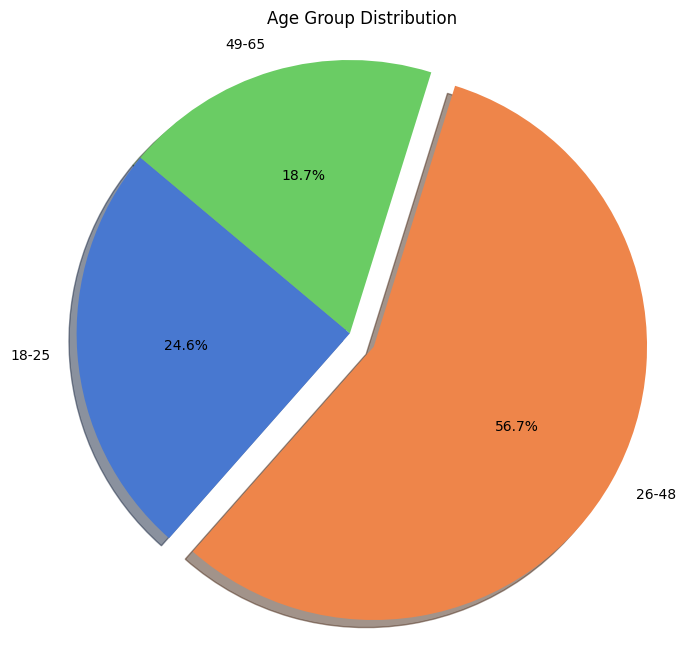

In [377]:
## Plot pie chart for age group distribution
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'),
shadow=True,
explode=(0, 0.1, 0)
)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


In [378]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [379]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [380]:
df_cust.groupby(['location', 'gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [381]:
cust_location_age =  df_cust.groupby(['location', 'gender']).size().unstack()
cust_location_age

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


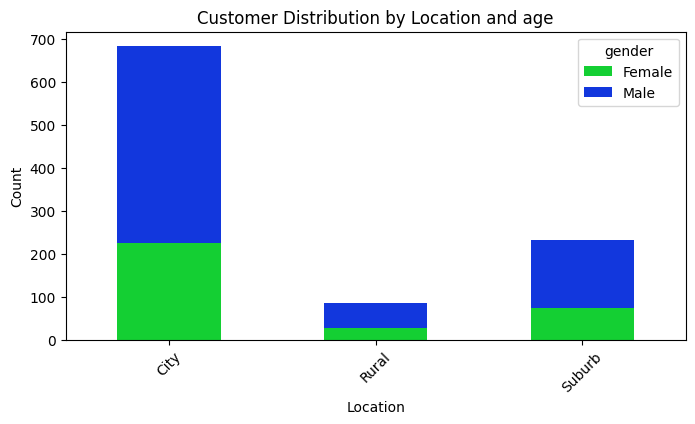

In [382]:
cust_location_age.plot(kind='bar', stacked=True, figsize=(8, 4), color=["#14cf33", "#1237dd"])
plt.title('Customer Distribution by Location and age')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()